# ASR

In [5]:
# from ASRCode.asr import ASR
# !pip install pyriemann

In [4]:
!pip install pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.8 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyedflib

In [ ]:
raw = np.load('eeg_raw.npy')
sfreq = 250

In [ ]:
raw.shape

(8, 15001)

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=sfreq, method='euclid', blocksize=10)
train_idx = np.arange(0 * sfreq, 30 * sfreq, dtype=int)
_, sample_mask = asr.fit(raw[:, train_idx])

[[ 2.87908234e+01 -3.00263170e+00 -3.74640673e-01 -2.53702305e+00
   4.77857911e+00 -1.28298310e+00  2.52490035e+00 -3.00269545e+00]
 [-3.00263170e+00  1.61536999e+01  1.29425507e+00  8.55626794e-01
  -6.31266689e-01 -8.46770617e-01  3.95021858e-01 -2.68900257e+00]
 [-3.74640673e-01  1.29425507e+00  1.28021154e+01  6.91812733e-01
   2.53676352e-02  1.35213213e+00 -1.94109346e+00 -3.64871008e+00]
 [-2.53702305e+00  8.55626794e-01  6.91812733e-01  1.24335952e+01
   5.89139565e-01  5.95067278e-01  8.98091300e-01 -2.53471325e+00]
 [ 4.77857911e+00 -6.31266689e-01  2.53676352e-02  5.89139565e-01
   1.41550990e+01  2.09059191e-01  9.24725225e+00  8.39084997e-01]
 [-1.28298310e+00 -8.46770617e-01  1.35213213e+00  5.95067278e-01
   2.09059191e-01  1.53741892e+01 -2.17460822e+00 -2.41178846e+00]
 [ 2.52490035e+00  3.95021858e-01 -1.94109346e+00  8.98091300e-01
   9.24725225e+00 -2.17460822e+00  1.75893166e+01 -4.24583189e-01]
 [-3.00269545e+00 -2.68900257e+00 -3.64871008e+00 -2.53471325e+00
   

In [ ]:
clean, mask = asr.transform(raw)

(8, 5021)
(8, 5021)
(8, 5021)
120504


In [ ]:
clean.shape

(8, 15001)

In [ ]:
mask.shape

(15001,)

In [ ]:
def separate_array(array_in):
  start = 0
  end = 0
  list_arrays = []
  for id in np.arange(1,len(array_in)):
    end = id
    if array_in[id] != array_in[id-1]+1:
      # print(array_in[id])
      # print(array_in[id-1])
      list_arrays.append(array_in[start:end])
      start = end
  return list_arrays

In [ ]:
mask_ids = np.where(mask==False)[0]

In [ ]:
mask_ids.shape

(4323,)

In [ ]:
list_segments = separate_array(mask_ids)

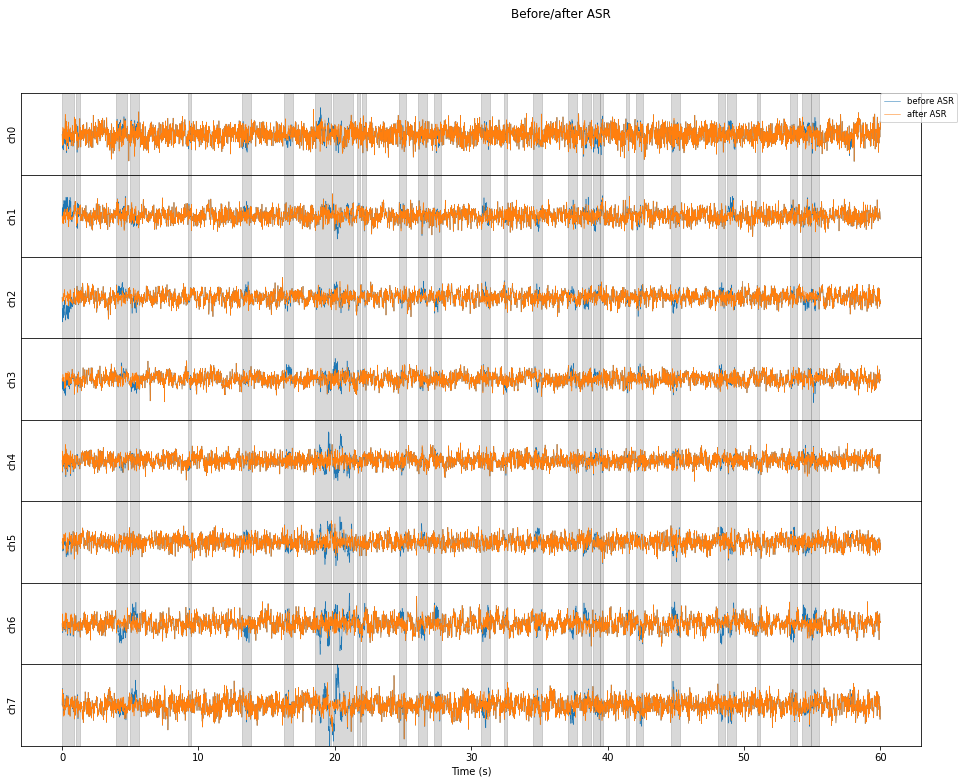

In [ ]:
times = np.arange(raw.shape[-1]) / sfreq
f, ax = plt.subplots(8, sharex=True, figsize=(20, 12))
for i in range(8):
  ax[i].plot(times, raw[i], lw=.5, label='before ASR')
  ax[i].plot(times, clean[i], label='after ASR', lw=.5)
  ax[i].set_ylim([-50, 50])
  ax[i].set_ylabel(f'ch{i}')
  ax[i].set_yticks([])
  # print(range(len(mask_ids)-1))
  j=0
  for array in list_segments:
    # print(tmp_ids)
    ax[i].fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax[i].get_xaxis_transform())
    j += 2
ax[i].set_xlabel('Time (s)')
ax[0].legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

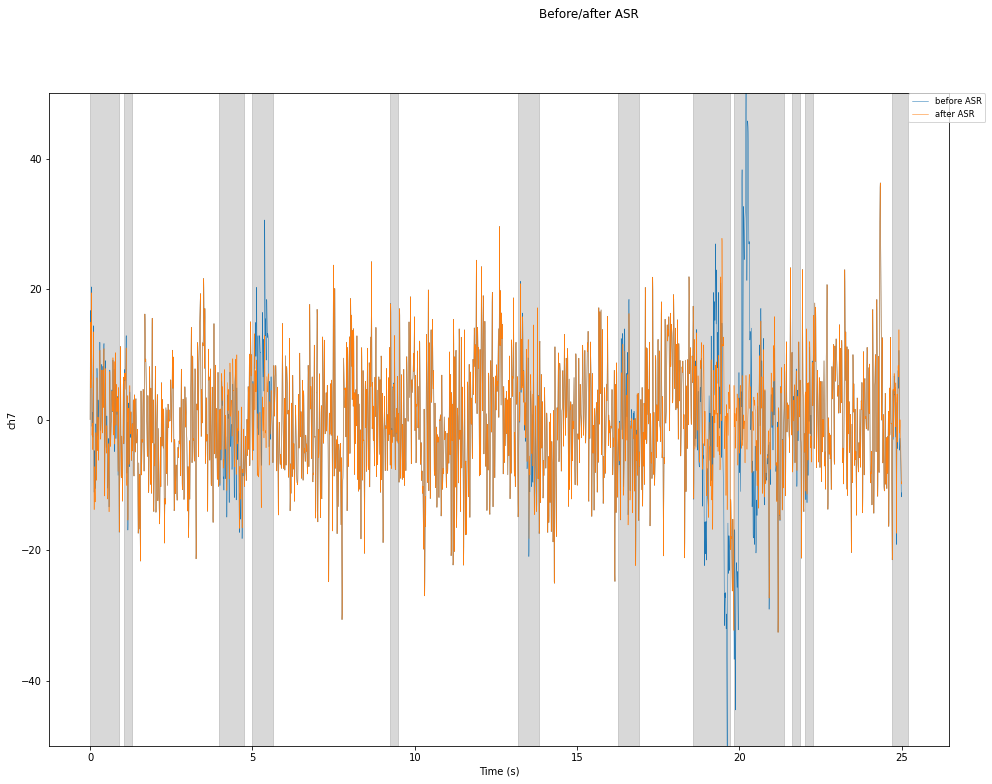

In [ ]:
times = np.arange(6250) / sfreq #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, raw[7,0:6250], lw=.5, label='before ASR')
ax.plot(times, clean[7,0:6250], label='after ASR', lw=.5)
ax.set_ylim([-50, 50])
ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/sfreq <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / sfreq, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

## Tested on our data

In [ ]:
edf_in = pyedflib.EdfReader('epoch2.edf')

In [ ]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [ ]:
N=edf_in.getNSamples()[0]

In [ ]:
chns = np.arange(nch)
signal = np.array([], dtype=np.int64).reshape(0,N)
for chan in chns:
  chn_sig = edf_in.readSignal(chan)
  signal = np.vstack([signal, chn_sig])
signal.shape

(15, 614528)

In [ ]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
t = np.arange(0,N)/srate

In [ ]:
# Train on a clean portion of data
asr = ASR(sfreq=srate, method='euclid', blocksize=10)
train_idx = np.arange(0 * srate, 30 * srate, dtype=int)
_, sample_mask = asr.fit(signal[:, train_idx])

In [ ]:
clean, mask = asr.transform(signal)

(15, 205013)
(15, 205013)
(15, 205014)
9225600


In [ ]:
mask.shape

(15, 614528)

In [ ]:
clean.shape

(15, 614528)

In [ ]:
np.logical_not(mask[0,0:10])

array([False, False, False, False, False, False, False,  True,  True,
        True])

In [ ]:
mask[:,0:10]

array([[ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True, 

In [ ]:
mask_final = np.logical_not(mask[0,:])
for i in np.arange(2,mask.shape[0]):
  tmp = np.logical_not(mask[i,:])
  mask_final = np.logical_or(mask_final,tmp)
mask_final[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
mask_ids = np.where(mask_final==True)[0]

In [ ]:
mask_ids

array([     0,      1,      2, ..., 491359, 491360, 491361])

In [ ]:
list_segments = separate_array(mask_ids)

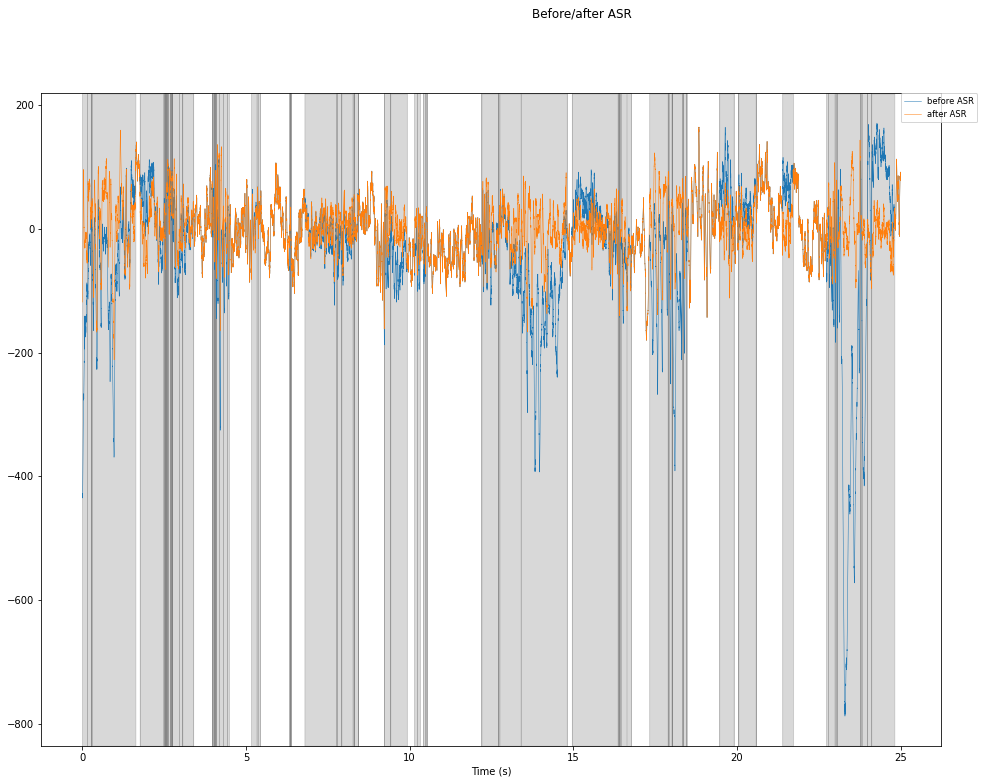

In [ ]:
end_time_id = int(25*srate)
times = np.arange(end_time_id) / srate #raw.shape[-1]
f, ax = plt.subplots(figsize=(20, 12))
ax.plot(times, signal[10,0:end_time_id], lw=.5, label='before ASR')
ax.plot(times, clean[10,0:end_time_id], label='after ASR', lw=.5)
# ax.set_ylim([-50, 50])
# ax.set_ylabel(f'ch{i}')
# print(range(len(mask_ids)-1))
j=0
for array in list_segments:
  if (array[0]/srate <= times[-1]):
    # print(tmp_ids)
    ax.fill_between(array / srate, 0, 1, color='grey', alpha=.3,
                      transform=ax.get_xaxis_transform())
  j += 2
ax.set_xlabel('Time (s)')
ax.legend(fontsize='small', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.subplots_adjust(hspace=0, right=0.75)
plt.suptitle('Before/after ASR')
plt.show()

# Autoreject


In [1]:
!pip install autoreject
import autoreject


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mne
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
!pip install pyedflib
import pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
def get_montage(ch_pos, subject, subjects_dir):
    """Get montage given Surface RAS (aka mri coordinates in MNE)
    Parameters
    ----------
    ch_pos : dict
        Dictionary of channel positions. Keys are channel names and values
        are 3D coordinates - array of shape (3,) - in native digitizer space
        in m.
    subject ： str
        the name of subject in FreeSurfer
    subjects_dir : str
        the directory of your FreeSurfer subject directory

    Returns : head montage
    -------
        
    """
    subj_trans = mne.coreg.estimate_head_mri_t(subject, subjects_dir)
    mri_to_head_trans = mne.transforms.invert_transform(subj_trans)
    print('Start transforming mri to head')
    print(mri_to_head_trans)

    montage_mri = mne.channels.make_dig_montage(ch_pos, coord_frame='mri')
    montage = montage_mri.copy()
    montage.add_estimated_fiducials(subject, subjects_dir)
    montage.apply_trans(mri_to_head_trans)
    return montage_mri, montage

In [4]:
edf_in = pyedflib.EdfReader('epoch2.edf')

In [5]:
labels = edf_in.getSignalLabels()
nch = len(labels)

In [6]:
labels

['LMiLs6-7',
 'LMiLs7-8',
 'LMiLs8-9',
 'RACg9-10',
 'RAOFr9-10',
 'RASSMA2-3',
 'RASSMA7-8',
 'RASSMA8-9',
 'RPLs5-6',
 'RPLs9-10',
 'RPOFr9-10',
 'RSLs1-2',
 'RSLs4-5',
 'RSLs5-6',
 'RSLs6-7']

In [7]:
N=edf_in.getNSamples()[0]

In [8]:
chns = np.arange(nch)
signal = np.array([], dtype=np.int64).reshape(0,N)
for chan in chns:
  chn_sig = edf_in.readSignal(chan)
  signal = np.vstack([signal, chn_sig])
signal.shape

(15, 614528)

In [9]:
srate = edf_in.getSampleFrequencies()[0]/edf_in.datarecord_duration
n_epoch = int(5*srate) # 5 seconds
signal.shape[1]/n_epoch

60.0125

In [10]:
signal_epoch = np.zeros((int(signal.shape[1]/n_epoch), signal.shape[0], n_epoch))
id = 0
for epoch_id in np.arange(int(signal.shape[1]/n_epoch)):
  tmp = signal[:,id:id+n_epoch]
  signal_epoch[epoch_id,:,:] = tmp
  id += n_epoch
signal_epoch.shape

(60, 15, 10240)

In [19]:
info = mne.create_info(ch_names=labels,
                       ch_types=['grad'] * len(labels),
                       sfreq=srate)

In [20]:
mne_epochs = mne.EpochsArray(signal_epoch, info)

Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


In [33]:
from autoreject import AutoReject, compute_thresholds
exclude = []  # XXX
picks = mne.pick_types(mne_epochs.info, meg='grad', exclude=exclude)
ar = AutoReject(random_state=42, n_jobs=-1, verbose=True)

In [34]:
epochs_ar, reject_log = ar.fit_transform(mne_epochs, return_log=True)

RuntimeError: ignored

# Extra

In [ ]:
a = np.array([1,2, 3])
b = np.array([0,4,5])
a < b

array([False,  True,  True])

In [ ]:
import psutil
psutil.virtual_memory()

svmem(total=13616332800, available=12602802176, percent=7.4, used=718704640, free=10122727424, active=778911744, inactive=2490535936, buffers=357003264, cached=2417897472, shared=1331200, slab=158765056)

In [ ]:
avail_mem = psutil.virtual_memory()[1]

In [ ]:
ns = 1000000000000
nc = 64
blocksize = 10
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

6553600000065536.0
12601036800


In [ ]:
if req_mem>avail_mem:
        # Recalculate the blocksize
        blocksize = int(-(16*nc*nc*ns)/(16*nc*nc - avail_mem*0.8))
blocksize

6501094

In [ ]:
req_mem = nc*nc*16*(ns+blocksize)/blocksize
print(req_mem)
print(avail_mem)

10080830404.189877
12601036800
